In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
path = '/content/housing.csv'
df = pd.read_csv(path)
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
df.info()

In [6]:
df.shape

(20640, 10)

In [ ]:
df.describe()

In [18]:
#Checking Unique count in ocean_proximity
unique_count = df['ocean_proximity'].nunique()
unique_count

5

In [17]:
#Checking for missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

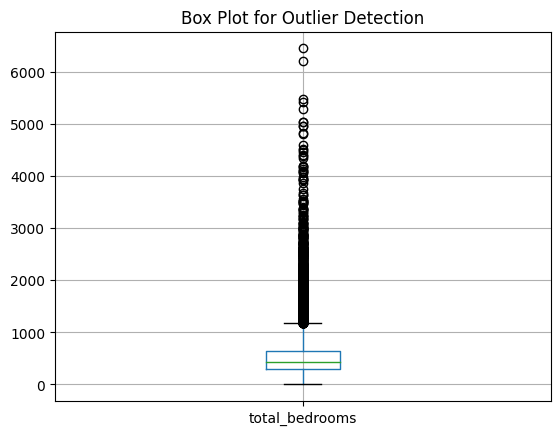

In [19]:
#Checking for an outlier in total_bedrooms. This is to help determine whether to use mean or median to compute my
#missing values

# Create box plots for each column
df.boxplot(column=['total_bedrooms'])
plt.title('Box Plot for Outlier Detection')
plt.show()


In [20]:
# Calculate the median value of the column.
#Using median because there is an outlier and the mean is affected by the outlier

median_value = df['total_bedrooms'].median()

df['total_bedrooms'].fillna(median_value, inplace=True)


In [ ]:
#Checking again to see if the missing value is computed
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

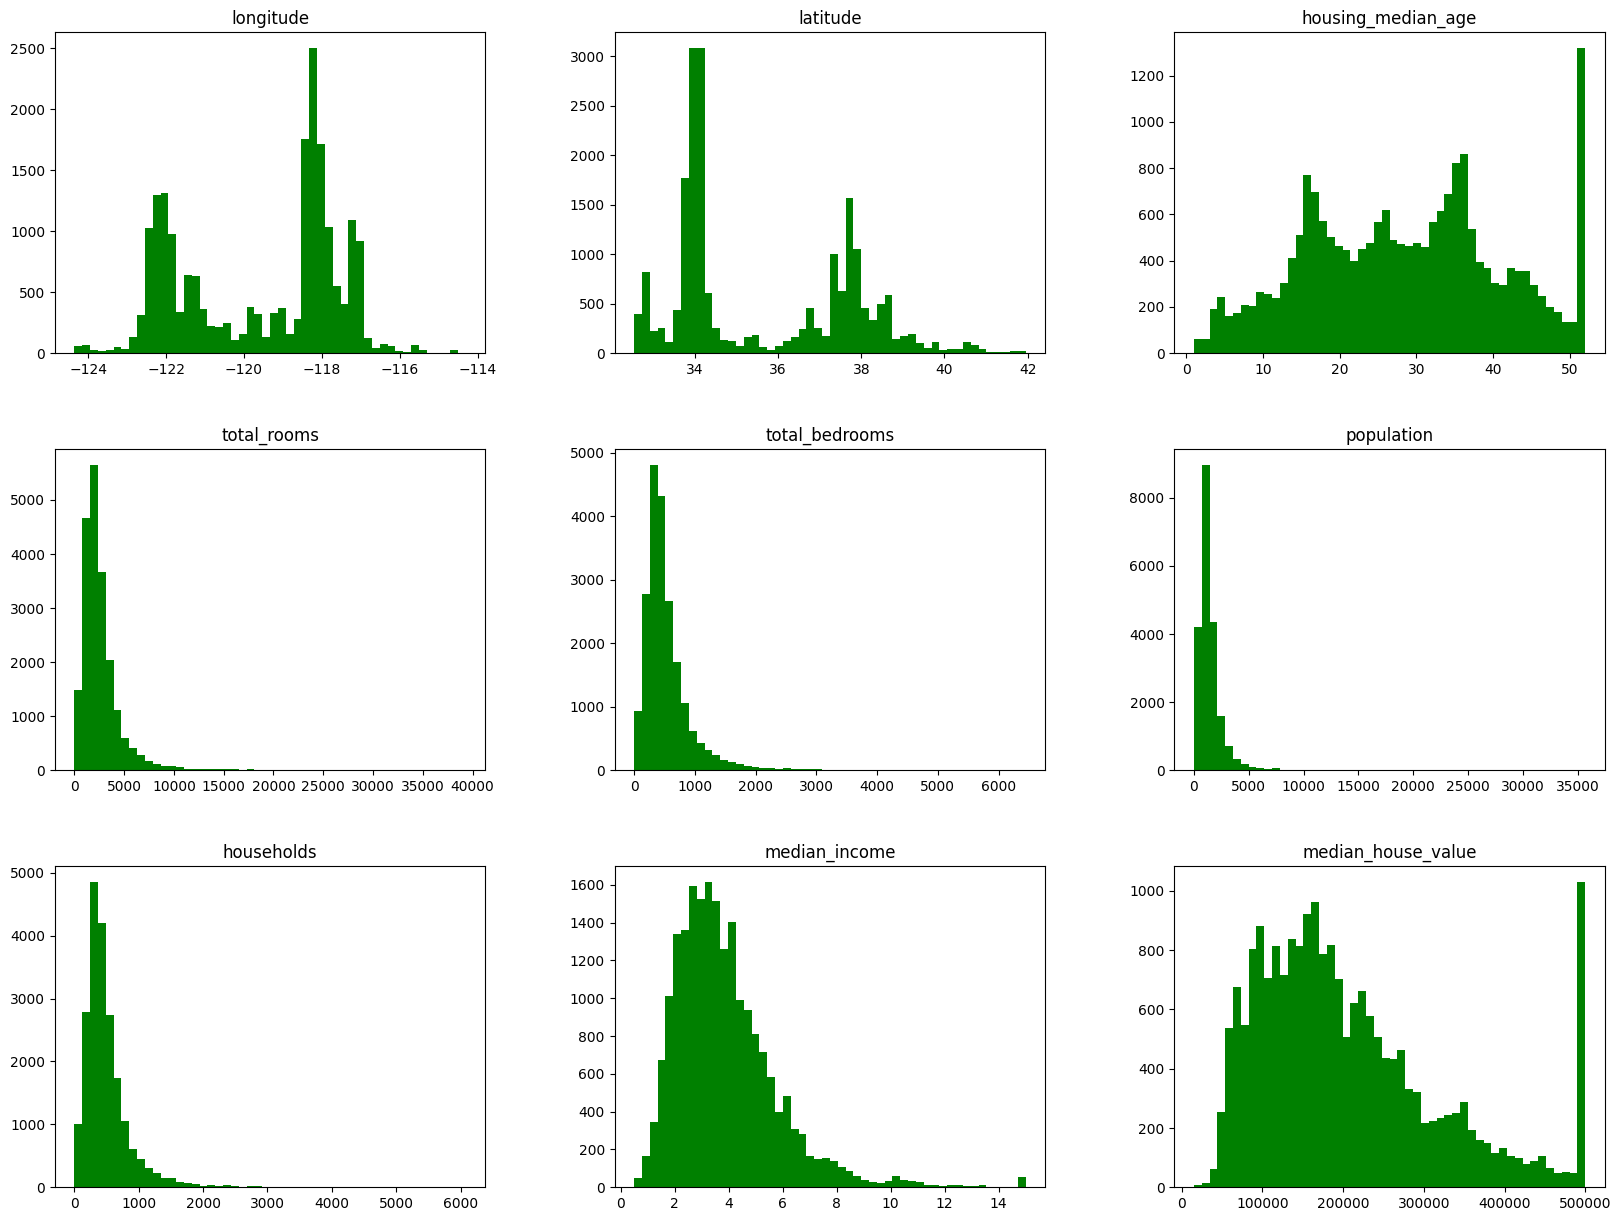

In [23]:
# Histograms for each numerical attribute
df.hist(bins=50, figsize=(20,15), color='green', grid=False)  # Set color to green and remove grid lines
plt.show()


#**Heatmap of the correlation matrix**

<ipython-input-28-b9bd755a9001>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


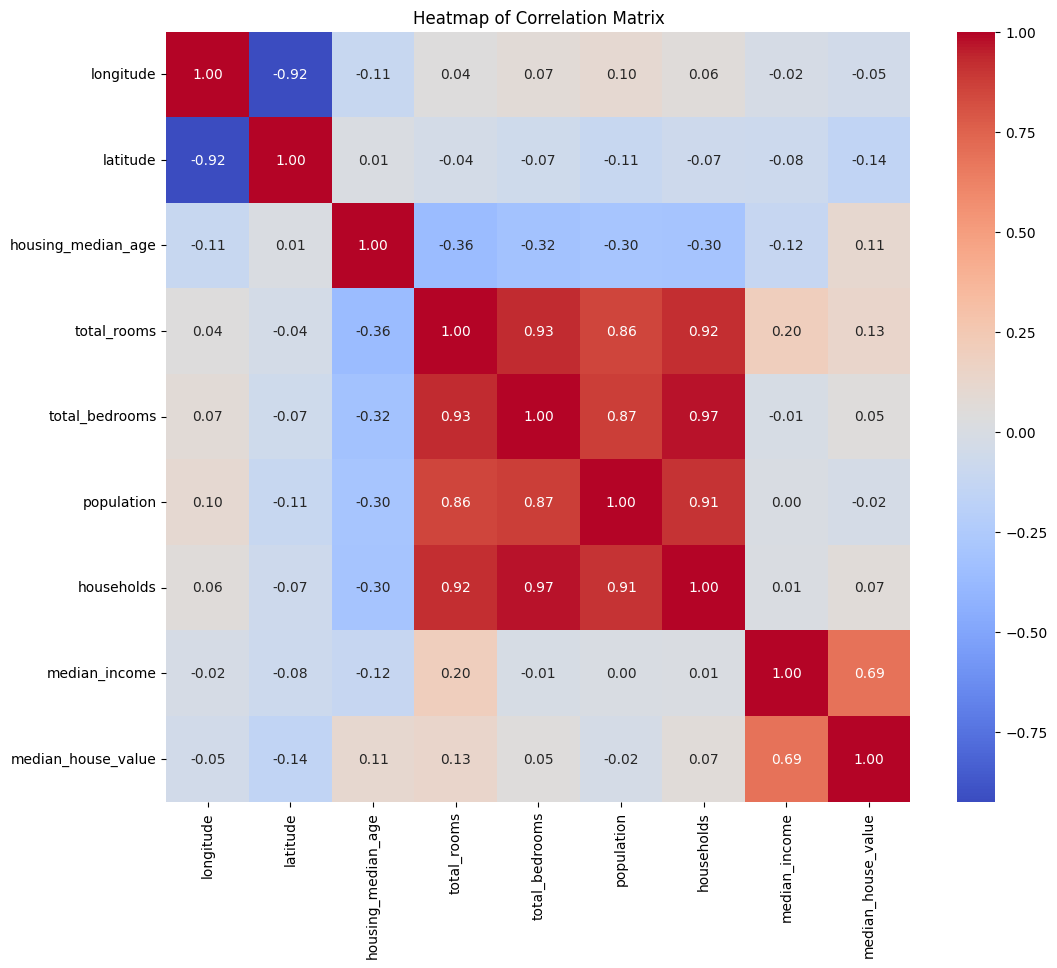

In [28]:
# Calculate the correlation matrix to see the realtionship between my variables
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

#**Categorical values Encoding Using OneHotEncoding**

In [ ]:
# One-hot encoding of the 'ocean_proximity' column
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])

In [30]:
# Display the first few rows of the modified dataframe
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


#**Selecting my Target and Features**

In [31]:
# Independent variables (all columns except 'median_house_value')
X = df_encoded.drop('median_house_value', axis=1)

# Dependent variable ('median_house_value')
y = df_encoded['median_house_value']

#**Feature Scalling**

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

#**Spliting the data into Test and Train Set**

In [38]:

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)


In [39]:
X_train, X_test, y_train, y_test

(array([[-1.25795692,  1.10873067, -1.79889009, ..., -0.01556621,
          2.83074203, -0.38446649],
        [ 1.31755758, -0.79678867, -1.24268354, ..., -0.01556621,
         -0.35326426, -0.38446649],
        [ 0.65870503, -0.7780612 ,  0.66431034, ..., -0.01556621,
         -0.35326426, -0.38446649],
        ...,
        [ 0.80345294, -0.53928605,  0.26701995, ..., -0.01556621,
         -0.35326426, -0.38446649],
        [-1.13317424,  0.7903638 , -0.52756083, ..., -0.01556621,
         -0.35326426, -0.38446649],
        [ 0.62376588, -0.67037829,  0.58485227, ..., -0.01556621,
         -0.35326426, -0.38446649]]),
 array([[-1.41767875,  1.14150373, -0.68647699, ..., -0.01556621,
          2.83074203, -0.38446649],
        [-0.19480849,  1.54414418, -0.52756083, ..., -0.01556621,
         -0.35326426, -0.38446649],
        [ 0.38418314, -0.63760523, -1.32214162, ..., -0.01556621,
         -0.35326426, -0.38446649],
        ...,
        [-1.37774829,  1.07595761,  0.42593611, ..., -

#**Linear Regression**

In [40]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_pred))

#**Decision Tree**

In [41]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_pred = tree_reg.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_pred))

#**Random Forest**

In [42]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_pred = forest_reg.predict(X_test)
forest_rmse = np.sqrt(mean_squared_error(y_test, forest_pred))


#**ANN**

In [43]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Preprocessing: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating the ANN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=X_train_scaled.shape[1:]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.1)

# Predictions and evaluation
ann_pred = model.predict(X_test_scaled)
ann_rmse = np.sqrt(mean_squared_error(y_test, ann_pred))


Epoch 1/10
465/465 [==============================] - 2s 2ms/step - loss: 55021883392.0000 - val_loss: 52564987904.0000
Epoch 2/10
465/465 [==============================] - 1s 2ms/step - loss: 43880865792.0000 - val_loss: 33440669696.0000
Epoch 3/10
465/465 [==============================] - 1s 2ms/step - loss: 22416470016.0000 - val_loss: 14675462144.0000
Epoch 4/10
465/465 [==============================] - 1s 2ms/step - loss: 10958868480.0000 - val_loss: 9849251840.0000
Epoch 5/10
465/465 [==============================] - 1s 2ms/step - loss: 8734865408.0000 - val_loss: 8691700736.0000
Epoch 6/10
465/465 [==============================] - 1s 3ms/step - loss: 7885127680.0000 - val_loss: 7930080256.0000
Epoch 7/10
465/465 [==============================] - 2s 4ms/step - loss: 7254632448.0000 - val_loss: 7315366912.0000
Epoch 8/10
465/465 [==============================] - 2s 4ms/step - loss: 6747480064.0000 - val_loss: 6837039104.0000
Epoch 9/10
465/465 [=============================

In [44]:

# Print the RMSE of each model
print(f"Linear Regression RMSE: {lin_rmse}")
print(f"Decision Tree Regressor RMSE: {tree_rmse}")
print(f"Random Forest Regressor RMSE: {forest_rmse}")
print(f"ANN Model RMSE: {ann_rmse}")

Linear Regression RMSE: 69468.5437388499
Decision Tree Regressor RMSE: 70212.20350943068
Random Forest Regressor RMSE: 50010.151828155365
ANN Model RMSE: 75989.46930302911
